<a href="https://colab.research.google.com/github/bysergr/MetNumUN2024I/blob/main/Lab2/sreym_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U fortran-magic

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
try:
  philosophers['Bertrand':'Immanuel']
except:
  print("Error")

Error


## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 50 µs, sys: 0 ns, total: 50 µs
Wall time: 54.4 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(B)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time

matmul(a, b)

CPU times: user 26 µs, sys: 1 µs, total: 27 µs
Wall time: 30.5 µs


[[5, 8, 11], [8, 13, 18]]

**My own example 3 - Checking the matrix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    if rows_out != cols_out:
      print(f'The length of B is {rows_out} and not is the same of the length A[0] that is {cols_out}')
      return

    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time

matmul(a, b)

CPU times: user 36 µs, sys: 1 µs, total: 37 µs
Wall time: 40.8 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
matrix_a = [[1, 3, 1],
            [1, 5, 1]]

matrix_b = [[2, 2],
            [7, 2],
            [2, 4]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
matmul(matrix_a, matrix_b)

[[25, 12], [39, 16]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-1.026656171983811

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import random
import time

In [ ]:
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

In [ ]:
time_sum = 0
amount_iterations = 10

for i in range(amount_iterations):
  randa = random_matrix(600, 100)
  randb = random_matrix(100, 600)

  start = time.time()
  matmul(randa, randb)
  end = time.time()

  time_sum += end - start

average_time_python = (time_sum/amount_iterations)
print("Average execution time in Python: {0}".format(average_time_python))

Average execution time in Python: 11.20048792362213


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'Language': ['Python'], 'Average Time': [average_time_python]})
df

,Language,Average Time
0,Python,11.200488


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import time
import numpy as np

In [ ]:
time_sum = 0
amount_iterations = 10

for i in range(amount_iterations):
  first_matrix = np.random.rand(600, 100)
  second_matrix = np.random.rand(100, 600)

  start = time.time()
  np.dot(first_matrix, second_matrix)
  end = time.time()

  time_sum += end - start

average_time_numpy = (time_sum / 20)
print("Average execution time in Numpy: {0}".format(average_time_numpy))

Average execution time in Numpy: 0.001746070384979248


In [ ]:
df = pd.concat([df , pd.DataFrame({'Language': ['Numpy'], 'Average Time': [average_time_numpy]})], ignore_index=True)
df

,Language,Average Time
0,Python,11.200488
1,Numpy,0.001746


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 14.9 s, sys: 114 ms, total: 15 s
Wall time: 22 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 9.31 ms, sys: 5 µs, total: 9.32 ms
Wall time: 9.44 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 238 µs, sys: 4 µs, total: 242 µs
Wall time: 275 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Defining A (2x2)  and B (2x2)**

In [ ]:
%%fortran
subroutine fortran_random_matrix(m, n, out)
    integer, intent(in) :: m, n
    real(8), dimension(m, n), intent(out) :: out
    integer :: row, col

    call random_seed()
    call random_number(out)

    do row = 1, m
        do col = 1, n
            out(row, col) = out(row, col) * 10.0
        end do
    end do
end subroutine fortran_random_matrix

In [ ]:
%fortran_config --clean-cache

Clean cache: /root/.cache/ipython/fortranmagic/692c5763


In [ ]:
%%time

m = 2  # Rows
n = 2  # Columns

out = fortran_random_matrix(m, n)

print(out)

[[5.69806128 5.24680345]
 [7.23352273 8.89128566]]
CPU times: user 1.73 ms, sys: 0 ns, total: 1.73 ms
Wall time: 1.75 ms


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(A, B, out)
    real, intent(in) :: A(:,:)
    real, intent(in) :: B(:,:)
    real, intent(out) :: out(size(A,1), size(B,2))
    integer :: i, j, k
    integer :: rows_out, cols, rows, cols_out

    rows_out = size(A,1)
    cols = size(A,2)
    rows = size(B,1)
    cols_out = size(B,2)

    if (cols /= rows) then
        print *, "MY ERROR: wrong matrix multiplication"
        stop
    end if

    out = 0.0

    do i = 1, rows_out
        do j = 1, cols_out
            do k = 1, size(B,1)
                out(i, j) = out(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine fortran_matmul

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%%time

m = 2  # Rows
n = 2  # Columns

fortran_A = fortran_random_matrix(m, n)
fortran_B = fortran_random_matrix(m, n)

print("Matrix A 2*2 with Fortran is: \n{0}".format(fortran_A), '\n')
print("Matrix B 2*2 with Fortran is: \n{0}".format(fortran_B), '\n')

print("Matrix A*B 2*2 with Fortran is: \n{0}".format(fortran_matmul(fortran_A, fortran_B)), '\n')

Matrix A 2*2 with Fortran is: 
[[0.243046   9.64730355]
 [9.85373662 3.47362748]] 

Matrix B 2*2 with Fortran is: 
[[1.03015106 9.96723346]
 [2.50206404 3.8408293 ]] 

Matrix A*B 2*2 with Fortran is: 
[[ 24.388544  39.476143]
 [ 18.842075 111.556114]] 

CPU times: user 5.34 ms, sys: 0 ns, total: 5.34 ms
Wall time: 9.07 ms


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul_big_size(A, B, out)
    real, intent(in) :: A(:,:)
    real, intent(in) :: B(:,:)
    real, intent(out) :: out(size(A,1), size(B,2))
    integer :: i, j, k
    integer :: rows_out, cols, rows, cols_out

    rows_out = size(A,1)
    cols = size(A,2)
    rows = size(B,1)
    cols_out = size(B,2)

    if (cols /= rows) then
        print *, "MY ERROR: wrong matrix multiplication"
        stop
    end if

    out = 0.0

    do i = 1, rows_out
        do j = 1, cols_out
            do k = 1, size(B,1)
                out(i, j) = out(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine fortran_matmul_big_size

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
%%time

fortran_A = fortran_random_matrix(600, 100)
fortran_B = fortran_random_matrix(100, 600)

print("Matrix A 600*100 with Fortran is: \n{0}".format(fortran_A), '\n')
print("Matrix B 100*600 with Fortran is: \n{0}".format(fortran_B), '\n')

print("Matrix A*B 600*600 with Fortran is: \n{0}".format(fortran_matmul_big_size(fortran_A, fortran_B)), '\n')

Matrix A 600*100 with Fortran is: 
[[8.36959797 0.97652505 4.15687286 ... 6.40973832 5.78322543 0.0932806 ]
 [9.95316536 6.14545167 8.59810158 ... 6.75666424 1.36682954 3.6800657 ]
 [0.07935449 1.71255808 6.75583529 ... 4.29110231 3.3550091  8.54931738]
 ...
 [1.64074739 6.00744905 9.70995688 ... 3.33444825 5.87325963 2.19462531]
 [0.01772752 9.96743285 9.7561124  ... 0.9627605  8.79679168 6.08539754]
 [0.91225064 1.50130204 1.49889622 ... 0.96419325 7.12533973 4.80431742]] 

Matrix B 100*600 with Fortran is: 
[[9.30213633 8.49826121 6.41694412 ... 1.96125228 3.20075815 6.96934114]
 [9.62330143 0.40843183 2.98205156 ... 3.00424725 8.87473417 8.37009785]
 [7.57213841 2.58539176 9.85082901 ... 7.51463608 4.71507173 2.93330028]
 ...
 [9.69667115 4.85965726 2.6693817  ... 1.00868657 8.68648246 8.20044258]
 [9.51296341 5.05546662 8.50892939 ... 8.29109114 1.86541456 9.18144443]
 [4.26294669 6.76418125 9.16510144 ... 9.11499442 5.41462572 4.80845328]] 

Matrix A*B 600*600 with Fortran is: 
[

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import time

time_sum = 0
amount_iterations = 10

for i in range(amount_iterations):
  fortran_A = fortran_random_matrix(600, 100)
  fortran_B = fortran_random_matrix(100, 600)

  start_time = time.time()
  fortran_matmul_big_size(fortran_A, fortran_B)
  end_time = time.time()

  time_sum += end_time - start_time

average_time_fortran_magic = (time_sum/amount_iterations)
print("Average execution time with Fortran: {0}".format(average_time_fortran_magic))

Average execution time with Fortran: 0.04569046497344971


In [ ]:
df = pd.concat([df , pd.DataFrame({'Language': ['FortranMagic'], 'Average Time': [average_time_fortran_magic]})], ignore_index=True)
df

,Language,Average Time
0,Python,11.200488
1,Numpy,0.001746
2,FortranMagic,0.045690


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatMulFortran.f90

program matrix_multiplication
  implicit none
  integer, parameter :: m = 600
  integer, parameter :: n = 100
  integer, parameter :: p = 600
  real(8) :: randa(m,n), randb(n,p), mult(m,p)
  real(8) :: start_time, end_time, time_sum
  integer :: i, j, k

  call random_matrix(randa, m, n)
  call random_matrix(randb, n, p)

  time_sum = 0.0
  do i = 1, 10
    call cpu_time(start_time)
    call matmul(randa, randb, mult, m, n, p)
    call cpu_time(end_time)
    time_sum = time_sum + (end_time - start_time)
  end do

  print *, time_sum / 10.0
contains

  subroutine random_matrix(matrix, rows, cols)
    real(8), intent(out) :: matrix(:,:)
    integer, intent(in) :: rows, cols
    integer :: i, j
    do i = 1, rows
      do j = 1, cols
        call random_number(matrix(i, j))
      end do
    end do
  end subroutine random_matrix

  subroutine matmul(A, B, C, m, n, p)
    real(8), intent(in) :: A(m, n), B(n, p)
    real(8), intent(out) :: C(m, p)
    integer, intent(in) :: m, n, p
    integer :: i, j, k

    C = 0.0
    do i = 1, m
      do j = 1, p
        do k = 1, n
          C(i, j) = C(i, j) + A(i, k) * B(k, j)
        end do
      end do
    end do
  end subroutine matmul

end program matrix_multiplication


Overwriting MatMulFortran.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%shell

gfortran MatMulFortran.f90 -o matmulfortran

In [ ]:
%%shell

./matmulfortran

  0.20150980000000002     


In [ ]:
import subprocess

result = subprocess.run(["./matmulfortran"], capture_output=True, text=True)

output_lines = result.stdout.strip().split("\n")
average_time_fortran = float(output_lines[-1].split()[-1])

# Print the average time
print("Average Time in Fortran:", average_time_fortran)

Average Time in Fortran: 0.2012156


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
df = pd.concat([df , pd.DataFrame({'Language': ['Fortran'], 'Average Time': [average_time_fortran]})], ignore_index=True)
df

,Language,Average Time
0,Python,11.200488
1,Numpy,0.001746
2,FortranMagic,0.045690
3,Fortran,0.201216


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatMulC.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

double **random_matrix(int m, int n) {
    double **out = (double **)malloc(m * sizeof(double *));
    for (int i = 0; i < m; i++) {
        out[i] = (double *)malloc(n * sizeof(double));
        for (int j = 0; j < n; j++) {
            out[i][j] = ((double)rand() / RAND_MAX);
        }
    }
    return out;
}

double **matmul(double **A, double **B, int rows_out, int cols, int cols_out) {
    double **out = (double **)malloc(rows_out * sizeof(double *));
    for (int i = 0; i < rows_out; i++) {
        out[i] = (double *)malloc(cols_out * sizeof(double));
        for (int j = 0; j < cols_out; j++) {
            out[i][j] = 0;
            for (int k = 0; k < cols; k++) {
                out[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return out;
}

int main() {
    srand(time(NULL));
    double time_sum = 0;
    int amount_iterations = 10;

    for (int i = 0; i < amount_iterations; i++) {
        double **randa = random_matrix(600, 100);
        double **randb = random_matrix(100, 600);

        clock_t start_time = clock();
        matmul(randa, randb, 600, 100, 600);
        clock_t end_time = clock();
        time_sum += (double)(end_time - start_time) / CLOCKS_PER_SEC;

        free(randa);
        free(randb);
    }

    double average_time_c = (time_sum / amount_iterations);
    printf("%f\n", average_time_c);

    return 0;
}

Overwriting MatMulC.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%shell

gcc MatMulC.c -o matmulc

In [ ]:
%%shell

./matmulc

0.246219


In [ ]:
import subprocess

result = subprocess.run(["./matmulc"], capture_output=True, text=True)

output_lines = result.stdout.strip().split("\n")
average_time_c = float(output_lines[-1].split()[-1])

# Print the average time
print("Average Time in C:", average_time_c)

Average Time in C: 0.341385


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
df = pd.concat([df , pd.DataFrame({'Language': ['C'], 'Average Time': [average_time_c]})], ignore_index=True)
df

,Language,Average Time
0,Python,11.200488
1,Numpy,0.001746
2,FortranMagic,0.045690
3,Fortran,0.201216
4,C,0.341385


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatMulCpp.cpp

#include <iostream>
#include <vector>
#include <cstdlib>
#include <ctime>

std::vector<std::vector<double>> random_matrix(int m, int n) {
    std::vector<std::vector<double>> out;
    for (int row = 0; row < m; ++row) {
        std::vector<double> rowVec;
        for (int col = 0; col < n; ++col) {
            rowVec.push_back(static_cast<double>(rand()) / RAND_MAX);
        }
        out.push_back(rowVec);
    }
    return out;
}

std::vector<std::vector<double>> matmul(const std::vector<std::vector<double>>& A, const std::vector<std::vector<double>>& B) {
    int rows_out = A.size();
    int cols = A[0].size();
    int rows = B.size();
    int cols_out = B[0].size();

    if (!(cols == rows)) {
        throw std::runtime_error("MY ERROR: wrong matrix multiplication");
    }

    std::vector<std::vector<double>> out(rows_out, std::vector<double>(cols_out, 0.0));

    for (int i = 0; i < rows_out; ++i) {
        for (int j = 0; j < cols_out; ++j) {
            for (int k = 0; k < B.size(); ++k) {
                out[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return out;
}

int main() {
    srand(static_cast<unsigned int>(time(0)));
    double time_sum = 0;
    int amount_iterations = 10;

    for (int i = 0; i < amount_iterations; ++i) {
        std::vector<std::vector<double>> randa = random_matrix(600, 100);
        std::vector<std::vector<double>> randb = random_matrix(100, 600);

        clock_t start_time = clock();
        matmul(randa, randb);
        clock_t end_time = clock();
        time_sum += static_cast<double>(end_time - start_time) / CLOCKS_PER_SEC;
    }

    double average_time_cpp = time_sum / amount_iterations;
    std::cout << average_time_cpp << std::endl;
    return 0;
}


Overwriting MatMulCpp.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%shell

g++ MatMulCpp.cpp -o matmulcpp

In [ ]:
%%shell

./matmulcpp

0.776505


In [ ]:
import subprocess

result = subprocess.run(["./matmulcpp"], capture_output=True, text=True)

output_lines = result.stdout.strip().split("\n")
average_time_cpp = float(output_lines[-1].split()[-1])

# Print the average time
print("Average Time in C++:", average_time_cpp)

Average Time in C++: 0.873955


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
df = pd.concat([df , pd.DataFrame({'Language': ['C++'], 'Average Time': [average_time_cpp]})], ignore_index=True)
df

,Language,Average Time
0,Python,11.200488
1,Numpy,0.001746
2,FortranMagic,0.045690
3,Fortran,0.201216
4,C,0.341385
5,C++,0.873955


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!pip install jupyter
!python -m ijava.install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.5 MB/s eta 0:00:00
/usr/bin/python3: Error while finding module specification for 'ijava.install' (ModuleNotFoundError: No module named 'ijava')


In [ ]:
!apt update -q
!apt-get install -q openjdk-11-jdk-headless
!curl -L https://github.com/SpencerPark/IJava/releases/download/v1.3.0/ijava-1.3.0.zip -o ijava-kernel.zip
!unzip -q ijava-kernel.zip -d ijava-kernel && cd ijava-kernel && python3 install.py --sys-prefix
!jupyter kernelspec list

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,742 kB]
Fetched 1,975 kB in 2s (1,005 kB/s)
Reading package lists...
Building dependency tree...
Reading state information...
35 packages can be upgraded. Run '

In [ ]:
%%writefile Matmul.java

import java.util.Random;

public class Matmul {

    public static double[][] randomMatrix(int m, int n) {
        double[][] out = new double[m][n];
        Random random = new Random();

        for (int i = 0; i < m; i++) {
            for (int j = 0; j < n; j++) {
                out[i][j] = random.nextDouble();
            }
        }

        return out;
    }

    public static double[][] matmul(double[][] A, double[][] B) {
        int rowsOut = A.length;
        int cols = A[0].length;
        int rows = B.length;
        int colsOut = B[0].length;

        if (cols != rows) {
            throw new IllegalArgumentException("MY ERROR: wrong matrix multiplication");
        }

        double[][] out = new double[rowsOut][colsOut];

        for (int i = 0; i < rowsOut; i++) {
            for (int j = 0; j < colsOut; j++) {
                for (int k = 0; k < B.length; k++) {
                    out[i][j] += A[i][k] * B[k][j];
                }
            }
        }

        return out;
    }

    public static void main(String[] args) {
        double timeSum = 0;
        int amount_iterations = 10;

        for (int i = 0; i < amount_iterations; i++) {
            double[][] randa = randomMatrix(600, 100);
            double[][] randb = randomMatrix(100, 600);

            long startTime = System.nanoTime();
            matmul(randa, randb);
            long endTime = System.nanoTime();
            timeSum += (endTime - startTime) / 1e9; // Convert nanoseconds to seconds
        }

        double averageTimeJava = timeSum / amount_iterations;
        System.out.println(averageTimeJava);
    }
}

Overwriting Matmul.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%shell

javac Matmul.java
java Matmul

0.08692962010000001


In [ ]:
import subprocess

subprocess.run(["javac", "Matmul.java"])

result = subprocess.run(["java", "Matmul"], capture_output=True, text=True)

average_time_java = float(result.stdout.strip())

# Print the average time
print("Average Time in Java:", average_time_java)

Average Time in Java: 0.14843388670000002


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
df = pd.concat([df , pd.DataFrame({'Language': ['Java'], 'Average Time': [average_time_java]})], ignore_index=True)
df

,Language,Average Time
0,Python,11.200488
1,Numpy,0.001746
2,FortranMagic,0.045690
3,Fortran,0.201216
4,C,0.341385
5,C++,0.873955
6,Java,0.148434


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile Matmul.js

function randomMatrix(m, n) {
    let out = [];
    for (let row = 0; row < m; row++) {
        let newRow = [];
        for (let col = 0; col < n; col++) {
            newRow.push(Math.random());
        }
        out.push(newRow);
    }
    return out;
}

function matmul(A, B) {
    // Multiply matrix A by matrix B.
    let rows_out = A.length;
    let cols = A[0].length;
    let rows = B.length;
    let cols_out = B[0].length;

    if (!(cols === rows)) {
        throw new Error("MY ERROR: wrong matrix multiplication");
    }

    let out = new Array(rows_out);
    for (let i = 0; i < rows_out; i++) {
        out[i] = new Array(cols_out).fill(0);
        for (let j = 0; j < cols_out; j++) {
            for (let k = 0; k < B.length; k++) {
                out[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return out;
}

let timeSum = 0;
const amount_iterations = 10;

for (let i = 0; i < amount_iterations; i++) {

    let randa = randomMatrix(600, 100);
    let randb = randomMatrix(100, 600);

    let startTime = Date.now();
    let mult = matmul(randa, randb);
    let endTime = Date.now();

    timeSum += (endTime - startTime) / 1000
}

let averageTimeJavaScript = timeSum / amount_iterations;
console.log(averageTimeJavaScript);

Overwriting Matmul.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices*

In [ ]:
import logging
import os

if os.path.exists("/tools/node/") == False:
  !apt install nodejs
  !npm i -g npm
else:
  !echo "nodejs Already installed"

nodejs Already installed


In [ ]:
!node Matmul.js

0.8016


In [ ]:
import subprocess

result = subprocess.run(["node", "Matmul.js"], capture_output=True, text=True)

average_time_javascript = float(result.stdout.strip())

# Print the average time
print("Average Time in Javascript:", average_time_javascript)

Average Time in Javascript: 0.9810999999999999


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
df = pd.concat([df , pd.DataFrame({'Language': ['JavaScript'], 'Average Time': [average_time_javascript]})], ignore_index=True)
df

,Language,Average Time
0,Python,11.200488
1,Numpy,0.001746
2,FortranMagic,0.045690
3,Fortran,0.201216
4,C,0.341385
5,C++,0.873955
6,Java,0.148434
7,JavaScript,0.981100


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
min_time_object = df.sort_values(by=['Average Time']).iloc[0]
min_time = min_time_object.get('Average Time')
min_time_object

Language           Numpy
Average Time    0.001746
Name: 1, dtype: object

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
speed_factor = [int(i/min_time) for i in df["Average Time"]]
df["Speed Factor"] = speed_factor

df.sort_values(by=['Speed Factor'])

,Language,Average Time,Speed Factor
1,Numpy,0.001746,1
2,FortranMagic,0.045690,26
6,Java,0.148434,85
3,Fortran,0.201216,115
4,C,0.341385,195
5,C++,0.873955,500
7,JavaScript,0.981100,561
0,Python,11.200488,6414


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df.sort_values(by=['Average Time'])

,Language,Average Time,Speed Factor
1,Numpy,0.001746,1
2,FortranMagic,0.045690,26
6,Java,0.148434,85
3,Fortran,0.201216,115
4,C,0.341385,195
5,C++,0.873955,500
7,JavaScript,0.981100,561
0,Python,11.200488,6414


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 553 µs, sys: 0 ns, total: 553 µs
Wall time: 564 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.54 ms, sys: 3.04 ms, total: 5.58 ms
Wall time: 5.64 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 223 µs, sys: 0 ns, total: 223 µs
Wall time: 232 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

Los datos se obtuvieron de datos.gov.co [10.000 Empresas mas Grandes del País](https://www.datos.gov.co/Comercio-Industria-y-Turismo/10-000-Empresas-mas-Grandes-del-Pa-s/6cat-2gcs/data_preview)


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
empresas_colombia = pd.read_csv('empresas_colombia.csv')
empresas_colombia

,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,Año de Corte
0,899999068,ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,$144.82,$33.41,$216.85,$125.81,$91.03,2022
1,900112515,REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,1921,MANUFACTURA,$27.86,$2.19,$42.84,$16.48,$26.36,2022
2,830095213,ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,4661,COMERCIO,$23.60,$0.33,$7.48,$4.47,$3.01,2022
3,860069804,CARBONES DEL CERREJON LIMITED,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,$16.39,$6.05,$10.45,$9.00,$1.45,2022
4,800021308,DRUMMOND LTD,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,$15.27,$2.16,$14.27,$6.34,$7.93,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,900440256,EFIVENTAS Y SERVICIOS SAS,SUPERSOCIEDADES,Costa Atlántica,ATLANTICO,BARRANQUILLA-ATLANTICO,7490,SERVICIOS,$0.01,$0.00,$0.01,$0.01,$0.00,2021
19996,890115230,QUIMIFEX SAS,SUPERSOCIEDADES,Costa Atlántica,ATLANTICO,BARRANQUILLA-ATLANTICO,4664,COMERCIO,$0.01,$0.00,$0.01,$0.01,$0.00,2021
19997,901021850,EDGE NETWORK SERVICES COLOMBIA SAS,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,6190,SERVICIOS,$0.01,$0.00,$0.04,$0.00,$0.04,2021
19998,900350192,DESTINO COMERCIAL SAS,SUPERSOCIEDADES,Antioquia,ANTIOQUIA,SABANETA-ANTIOQUIA,4771,COMERCIO,$0.01,$0.00,$0.01,$0.00,$0.00,2021


In [48]:
# Show the data type by each column in the dataframe
empresas_colombia.dtypes

NIT                        int64
RAZÓN SOCIAL              object
SUPERVISOR                object
REGIÓN                    object
DEPARTAMENTO DOMICILIO    object
CIUDAD DOMICILIO          object
CIIU                       int64
MACROSECTOR               object
INGRESOS OPERACIONALES    object
GANANCIA (PÉRDIDA)        object
TOTAL ACTIVOS             object
TOTAL PASIVOS             object
TOTAL PATRIMONIO          object
Año de Corte               int64
dtype: object

In [49]:
# Amount of companies by region in the country
amount_by_region = empresas_colombia.groupby(['REGIÓN']).size()
amount_by_region

REGIÓN
Antioquia                3821
Bogotá - Cundinamarca    9290
Centro - Oriente         1162
Costa Atlántica          2161
Costa Pacífica           2187
Eje Cafetero              707
Otros                     672
dtype: int64

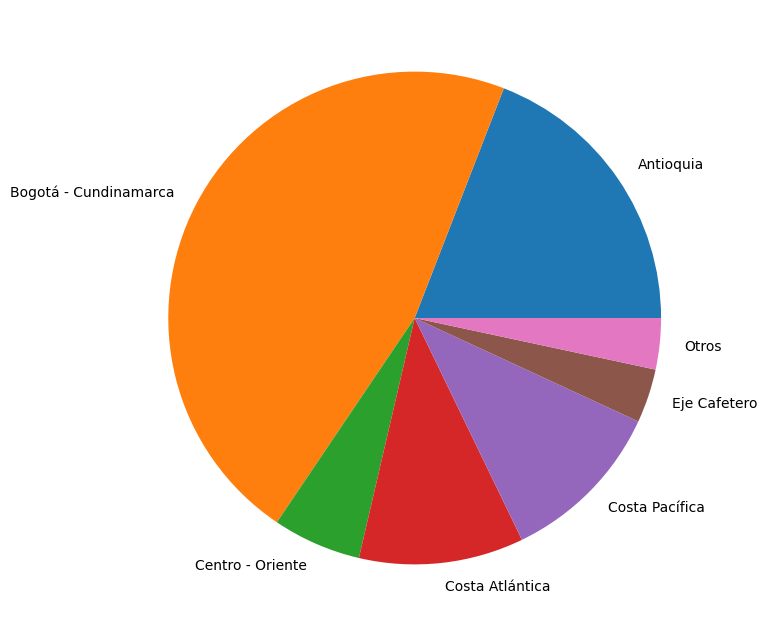

In [50]:
# Graphic Pie of amount of campanies by region
amount_by_region.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.show()

In [52]:
# Show the sum of total assets
try:
  empresas_colombia['TOTAL PATRIMONIO'] = empresas_colombia['TOTAL PATRIMONIO'].str.replace('$', '', regex=False).astype(float)
except:
  pass

sum_of_total_assets = empresas_colombia.groupby(['REGIÓN'])['TOTAL PATRIMONIO'].sum()
sum_of_total_assets

REGIÓN
Antioquia                 464.08
Bogotá - Cundinamarca    1152.70
Centro - Oriente           37.80
Costa Atlántica           177.26
Costa Pacífica            126.71
Eje Cafetero               20.32
Otros                      13.25
Name: TOTAL PATRIMONIO, dtype: float64

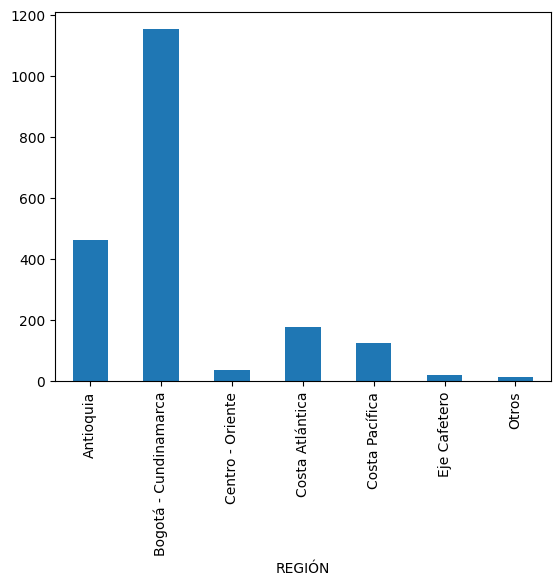

In [53]:
sum_of_total_assets.plot.bar();

In [60]:
# Show the sum of total assets
try:
  empresas_colombia['TOTAL ACTIVOS'] = empresas_colombia['TOTAL ACTIVOS'].str.replace('$', '', regex=False).astype(float)
  empresas_colombia['TOTAL PASIVOS'] = empresas_colombia['TOTAL PASIVOS'].str.replace('$', '', regex=False).astype(float)
except:
  pass

total_actives_and_passives = empresas_colombia[['RAZÓN SOCIAL', 'TOTAL ACTIVOS', 'TOTAL PASIVOS']]
total_actives_and_passives

,RAZÓN SOCIAL,TOTAL ACTIVOS,TOTAL PASIVOS
0,ECOPETROL S.A,216.85,125.81
1,REFINERIA DE CARTAGENA S.A.S,42.84,16.48
2,ORGANIZACIÓN TERPEL S.A.,7.48,4.47
3,CARBONES DEL CERREJON LIMITED,10.45,9.00
4,DRUMMOND LTD,14.27,6.34
...,...,...,...
19995,EFIVENTAS Y SERVICIOS SAS,0.01,0.01
19996,QUIMIFEX SAS,0.01,0.01
19997,EDGE NETWORK SERVICES COLOMBIA SAS,0.04,0.00
19998,DESTINO COMERCIAL SAS,0.01,0.00


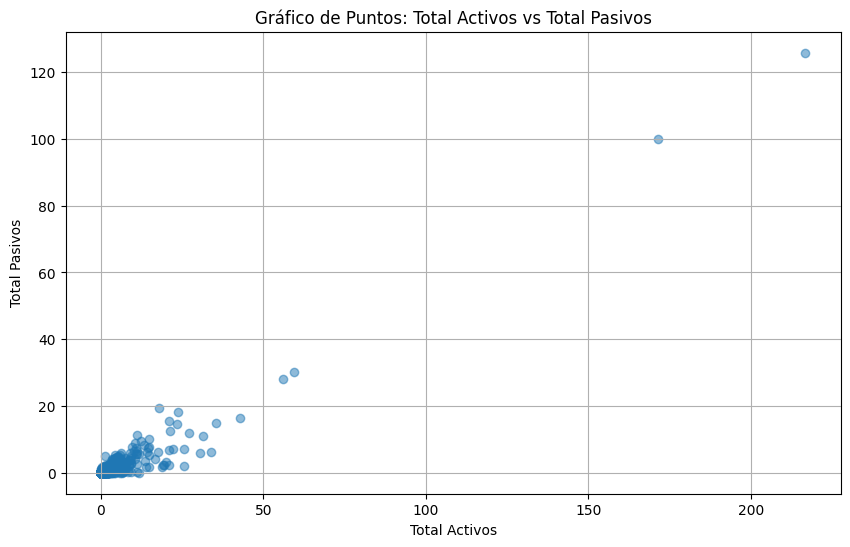

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(total_actives_and_passives['TOTAL ACTIVOS'], total_actives_and_passives['TOTAL PASIVOS'], alpha=0.5)
plt.title('Gráfico de Puntos: Total Activos vs Total Pasivos')
plt.xlabel('Total Activos')
plt.ylabel('Total Pasivos')
plt.grid(True)
plt.show()

In [63]:
# Average of income by sector
try:
  empresas_colombia['INGRESOS OPERACIONALES'] = empresas_colombia['INGRESOS OPERACIONALES'].str.replace('$', '', regex=True).astype(float)
except:
  pass

average_income_by_sector = empresas_colombia.groupby(['MACROSECTOR'])['INGRESOS OPERACIONALES'].mean()
average_income_by_sector

MACROSECTOR
AGROPECUARIO    0.069720
COMERCIO        0.135873
CONSTRUCCIÓN    0.068348
MANUFACTURA     0.171954
MINERO          0.991139
SERVICIOS       0.134285
Name: INGRESOS OPERACIONALES, dtype: float64

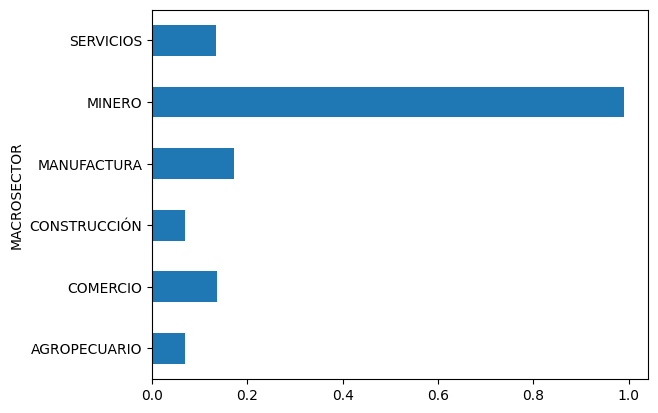

In [65]:
average_income_by_sector.plot.barh();

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!